Image Classification with CNN's

In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load the CIFAR-10 Dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Step 3: Normalize the Data
# Pixel values range from 0 to 255, we normalize them to range 0 to 1.
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# Step 4: Build the CNN Model
from tensorflow.keras import layers, models

model = models.Sequential([
    # Input layer
    layers.InputLayer(input_shape=(32, 32, 3)),

    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the 3D outputs to 1D for the fully connected layers
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),

    # Output layer with 10 classes (for CIFAR-10)
    layers.Dense(10)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3425 - loss: 1.7645 - val_accuracy: 0.5410 - val_loss: 1.2751
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.5708 - loss: 1.2036 - val_accuracy: 0.6216 - val_loss: 1.0822
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.6350 - loss: 1.0298 - val_accuracy: 0.6517 - val_loss: 0.9921
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.6764 - loss: 0.9273 - val_accuracy: 0.6855 - val_loss: 0.9178
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.7029 - loss: 0.8451 - val_accuracy: 0.6803 - val_loss: 0.9203
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7254 - loss: 0.7864 - val_accuracy: 0.6933 - val_loss: 0.8995
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7390 - loss: 0.7392 - val_accuracy: 0.6934 - val_loss: 0.9054
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.7559 -

In [8]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 5s - 15ms/step - accuracy: 0.6953 - loss: 0.9096

Test accuracy: 0.6952999830245972


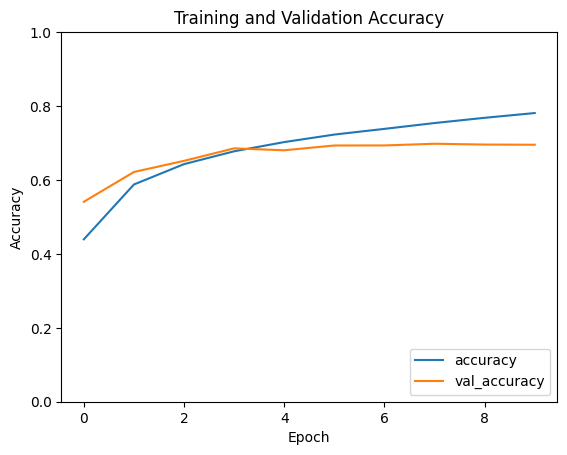

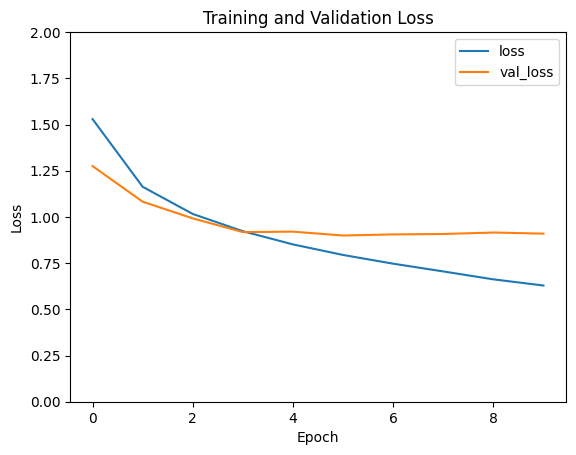

In [9]:
# Step 8: Visualize Training History (Optional)
# Plotting the accuracy and loss during training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()